<a href="https://colab.research.google.com/github/PIRATES7376/Computer-Vision-and-Pattern-Recognition--CVPR/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load necessary packages**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

np.random.seed(0)

**3-class dataset Generated**

In [3]:
class1 = np.random.randn(100, 2) + np.array([2, 2])
class2 = np.random.randn(100, 2) + np.array([-2, -2])
class3 = np.random.randn(100, 2) + np.array([2, -2])

X = np.vstack((class1, class2, class3))
Y = np.array([0]*100 + [1]*100 + [2]*100)

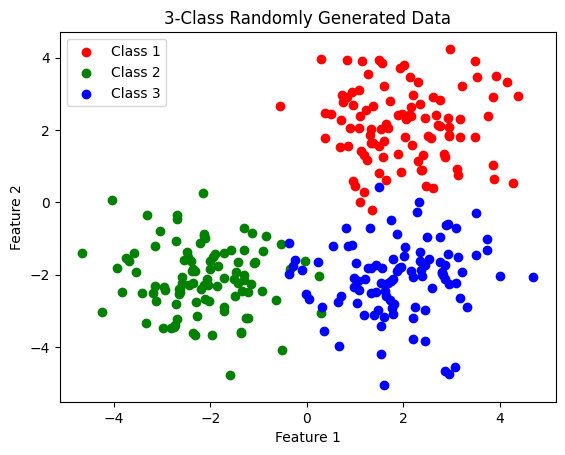

In [4]:
plt.figure()
plt.scatter(X[Y==0, 0], X[Y==0, 1], c='r', label='Class 1')
plt.scatter(X[Y==1, 0], X[Y==1, 1], c='g', label='Class 2')
plt.scatter(X[Y==2, 0], X[Y==2, 1], c='b', label='Class 3')
plt.title("3-Class Randomly Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Y_encoded = np.eye(3)[Y]

Neural Network Class

In [5]:
class NeuralNetwork:
    def __init__(self):
        self.W_HI = np.random.randn(2, 10)
        self.W_OH = np.random.randn(10, 3)
        self.learning_rate = 0.2

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)    # x is already sigmoid(x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, z):
        # numerically stable softmax
        z_shift = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_shift)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def feedForward(self, X):
        self.hidden_input  = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.logits = np.dot(self.hidden_output, self.W_OH)
        output = self.softmax(self.logits)              # <-- softmax instead of sigmoid
        return output

    def backPropagation(self, X, Y, output):
        m = X.shape[0]
        # softmax + cross-entropy => dZ_out = (output - Y) / m
        dZ_out = (output - Y) / m                       # shape (m, 3)

        # Gradients
        grad_W_OH = self.hidden_output.T @ dZ_out       # (10, 3)
        dHidden_linear = dZ_out @ self.W_OH.T           # (m, 10)
        dHidden = dHidden_linear * self.sigmoid(self.hidden_output, der=True)

        grad_W_HI = X.T @ dHidden                       # (2, 10)

        # Gradient descent step
        self.W_OH -= self.learning_rate * grad_W_OH
        self.W_HI -= self.learning_rate * grad_W_HI

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

    def cross_entropy(self, Y, output, eps=1e-12):
        output = np.clip(output, eps, 1 - eps)
        return -np.sum(Y * np.log(output)) / Y.shape[0]

**Training Error**

In [6]:
NN = NeuralNetwork()
errors = []

for epoch in range(10000):
    NN.train(X, Y_encoded)
    probs = NN.feedForward(X)
    error = NN.cross_entropy(Y_encoded, probs)
    errors.append(error)
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, CE Loss: {error:.5f}")

Epoch 0, CE Loss: 1.41771
Epoch 2000, CE Loss: 0.06812
Epoch 4000, CE Loss: 0.06567
Epoch 6000, CE Loss: 0.06438
Epoch 8000, CE Loss: 0.06358


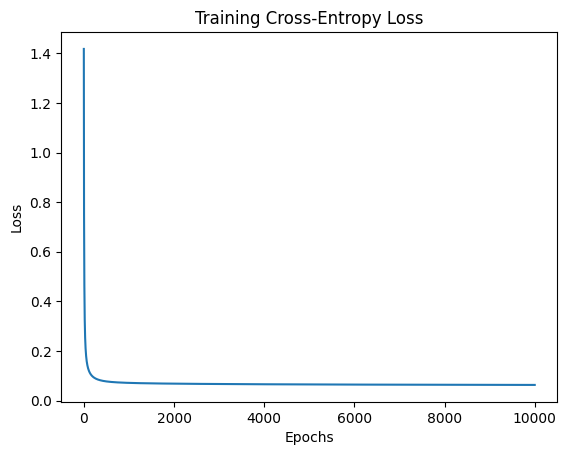

In [7]:
plt.plot(errors)
plt.title("Training Cross-Entropy Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

**Accuracy**

In [8]:
probs = NN.feedForward(X)
pred_classes = np.argmax(probs, axis=1)
accuracy = np.mean(pred_classes == Y)
print(f"Training Accuracy: {accuracy*100:.2f}%")

Training Accuracy: 97.33%


In [19]:
print(NN.feedForward(np.array([[1, 0]])))


[[0.63866065 0.00700931 0.35433004]]
